<a href="https://colab.research.google.com/github/saivinay111234/Udemy-Analysis-using-python/blob/main/Udemy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_datareader as web 
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
from matplotlib import colors
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

# **Load the EDX data**

In [2]:
udemy_data=pd.read_csv("udemy_courses.csv")
udemy_data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


# **Descriptive statistics**

In [3]:
udemy_data.describe().style.set_properties(**{"background-color": "lightgreen", "color":"black","border-color":"green"})

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,675971.963295,66.049483,3197.150625,156.259108,40.108755,4.094517
std,343273.156040,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8324.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,407692.500000,20.000000,111.000000,4.000000,15.000000,1.000000
50%,687917.000000,45.000000,911.500000,18.000000,25.000000,2.000000
75%,961355.500000,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1282064.000000,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [4]:
udemy_data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [5]:
udemy_data.shape

(3678, 12)

*Contains 3678 instances and 12 attributes*

In [6]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


# **Data Cleaning**

In [7]:
# finding missing values.
udemy_data.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [8]:
udemy_data["is_paid"].unique()

array([ True, False])

In [9]:
udemy_data['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

# **Converting categorical into numerical**

In [10]:
df=udemy_data
df['is_paid']=df.is_paid.apply(lambda x: 0 if x is False else 1)
df.is_paid.unique()

array([1, 0])

In [11]:
# Using get_dummies
dummies=pd.get_dummies(df.level)
df=pd.concat([df, dummies], axis='columns')
df.drop('level', axis=1, inplace=True)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,subject,All Levels,Beginner Level,Expert Level,Intermediate Level
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,1.5,2017-01-18T20:58:58Z,Business Finance,1,0,0,0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,39.0,2017-03-09T16:34:20Z,Business Finance,1,0,0,0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,2.5,2016-12-19T19:26:30Z,Business Finance,0,0,0,1
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,3.0,2017-05-30T20:07:24Z,Business Finance,1,0,0,0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,2.0,2016-12-13T14:57:18Z,Business Finance,0,0,0,1


1. Use get_dummies
2. Concatenate two dataframes using concat function and gives axis=1(attach through columns)
3. Remove the original column that is used to create dummies

In [12]:
type(df['subject'])

pandas.core.series.Series

In [13]:
# ONE HOT ENCODER
# encoder=OneHotEncoder(handle_unknown='ignore')
# encode_df=pd.DataFrame(encoder.fit_transform(df[['subject']]).toarray())
# df=df.join(encode_df)
# df.head()
dummies1=pd.get_dummies(df.subject)
df=pd.concat([df, dummies1], axis='columns')
df.drop('subject', axis=1, inplace=True)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,All Levels,Beginner Level,Expert Level,Intermediate Level,Business Finance,Graphic Design,Musical Instruments,Web Development
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,1.5,2017-01-18T20:58:58Z,1,0,0,0,1,0,0,0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,39.0,2017-03-09T16:34:20Z,1,0,0,0,1,0,0,0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,2.5,2016-12-19T19:26:30Z,0,0,0,1,1,0,0,0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,3.0,2017-05-30T20:07:24Z,1,0,0,0,1,0,0,0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,2.0,2016-12-13T14:57:18Z,0,0,0,1,1,0,0,0


# **Checking for Outliers**

**We can use BOXPLOTS.** 
***It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.***

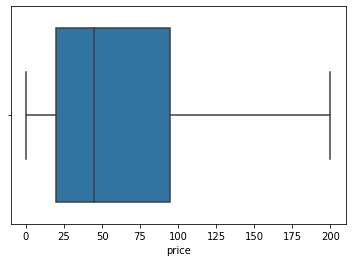

In [14]:
sns.boxplot(df['price'])

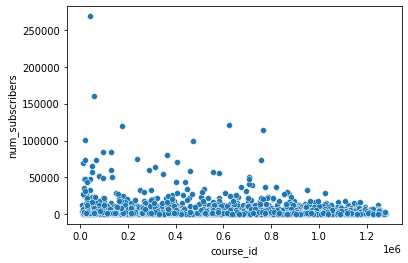

In [15]:
sns.scatterplot(x=df['course_id'], y=df['num_subscribers'])

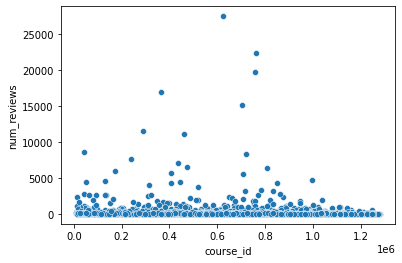

In [16]:
sns.scatterplot(x=df['course_id'], y=df['num_reviews'])

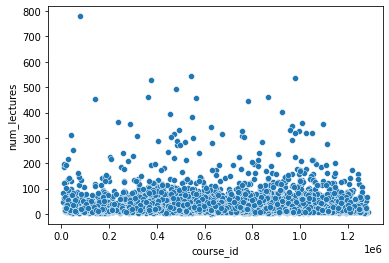

In [17]:
sns.scatterplot(x=df['course_id'], y=df['num_lectures'])

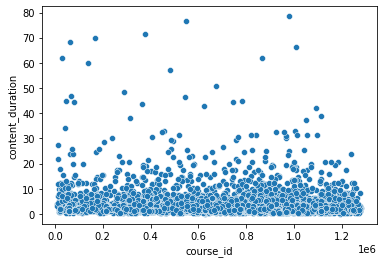

In [18]:
sns.scatterplot(x=df['course_id'], y=df['content_duration'])

In [19]:
# FINDING OUTLIERS USING Z-SCORE
from scipy import stats
 
z = np.abs(stats.zscore(df['num_subscribers']))
print(z)

threshold = 3
# Position of the outlier
print(np.where(z > 3))

0       0.110509
1       0.042635
2       0.107668
3       0.078519
4       0.202166
          ...   
3673    0.227001
3674    0.304241
3675    0.282458
3676    0.304873
3677    0.241628
Name: num_subscribers, Length: 3678, dtype: float64
(array([ 103,  143,  492, 1213, 1286, 1390, 1461, 1531, 1896, 1979, 1982,
       2004, 2478, 2479, 2497, 2561, 2589, 2592, 2619, 2662, 2701, 2779,
       2782, 2783, 2806, 2827, 3032, 3175, 3184, 3204, 3205, 3208, 3219,
       3228, 3230, 3232, 3233, 3238, 3246, 3247, 3249, 3251, 3254, 3289,
       3291, 3325, 3328, 3385, 3665]),)


In [20]:
# FINDING AND USING OUTLIERS USING IQR
Q1=np.percentile(df['num_subscribers'], 5, interpolation='midpoint')
Q3=np.percentile(df['num_subscribers'], 95, interpolation='midpoint')
IQR=Q3-Q1
upper0=np.where(df['num_subscribers']>=(Q3+1.5*IQR))
lower0=np.where(df['num_subscribers']<=(Q3-1.5*IQR))
print("----------------\n")
print(upper0)
print(lower0)

Q1=np.percentile(df['num_reviews'], 5, interpolation='midpoint')
Q3=np.percentile(df['num_reviews'], 95, interpolation='midpoint')
IQR=Q3-Q1
upper1=np.where(df['num_reviews']>=(Q3+1.5*IQR))
lower1=np.where(df['num_reviews']<=(Q3-1.5*IQR))
print("----------------\n")
print(upper1)
print(lower1)

Q1=np.percentile(df['num_lectures'], 5, interpolation='midpoint')
Q3=np.percentile(df['num_lectures'], 95, interpolation='midpoint')
IQR=Q3-Q1
upper2=np.where(df['num_lectures']>=(Q3+1.5*IQR))
lower2=np.where(df['num_lectures']<=(Q3-1.5*IQR))
print("----------------\n")
print(upper2)
print(lower2)

upper_arr=np.union1d(np.union1d(upper0, upper1), upper2)
lower_arr=np.union1d(np.union1d(lower0, lower1), lower2)
print(upper_arr, lower_arr)

print("Old Shape: ",df.shape)

----------------

(array([ 103,  143,  492, 1213, 1286, 1390, 1461, 1531, 1896, 1979, 1982,
       2004, 2478, 2479, 2497, 2561, 2589, 2592, 2619, 2662, 2701, 2779,
       2782, 2783, 2806, 2827, 3032, 3175, 3184, 3204, 3205, 3208, 3219,
       3228, 3230, 3232, 3233, 3238, 3246, 3247, 3249, 3251, 3254, 3289,
       3291, 3325, 3328, 3385, 3665]),)
(array([], dtype=int64),)
----------------

(array([  36,   38,   40,  103,  119,  143,  374, 1210, 1211, 1215, 1390,
       1409, 1461, 1979, 1980, 1982, 1983, 2508, 2509, 2511, 2512, 2589,
       2592, 2619, 2649, 2694, 2696, 2701, 2702, 2782, 2783, 2806, 2827,
       3139, 3175, 3200, 3201, 3204, 3205, 3206, 3208, 3209, 3219, 3222,
       3224, 3226, 3227, 3228, 3229, 3230, 3231, 3232, 3233, 3238, 3246,
       3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3256, 3289, 3291,
       3325, 3328, 3365, 3385, 3539, 3665]),)
(array([], dtype=int64),)
----------------

(array([ 114,  160,  330,  356,  528,  561,  655,  870, 1979, 1982, 1984,
  

In [21]:
if len(upper_arr)>0:
  df.drop(upper_arr, inplace=True)
else:
  print("No outliers in upperbound")

if len(lower_arr)>0:
  df.drop(lower_arr, inplace=True)
else:
  print("No outliers in lowerbound")

print("New Shape: ",df.shape)

No outliers in lowerbound
New Shape:  (3565, 18)


# **After Outlier Elimination**

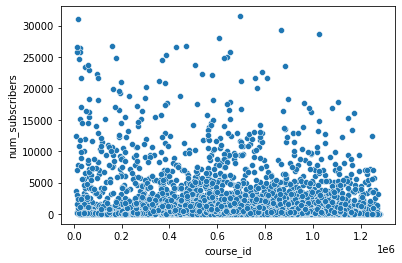

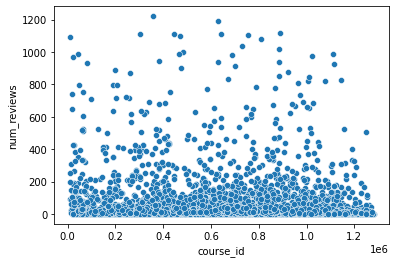

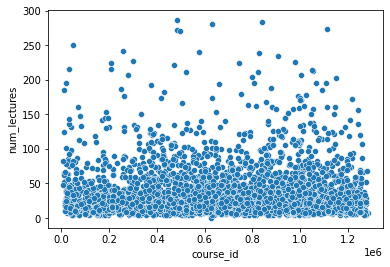

In [22]:
l=["num_subscribers", "num_reviews", "num_lectures"]
for i in l:
  sns.scatterplot(x=df['course_id'], y=df[i])
  plt.show()

# **Data Analysis**

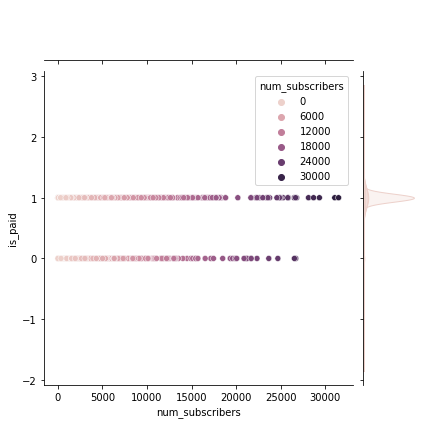

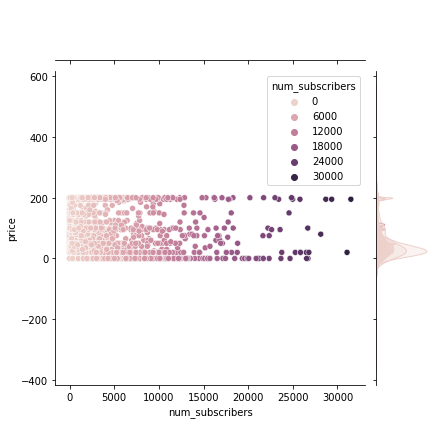

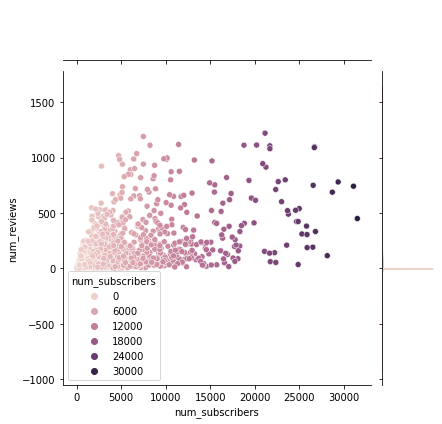

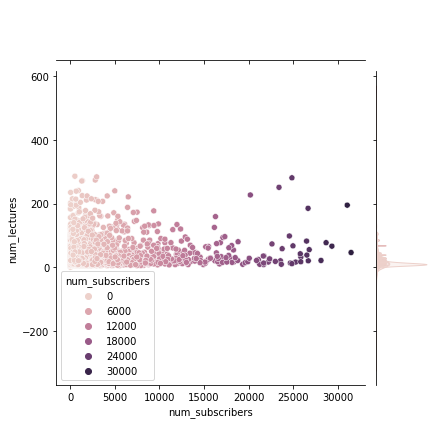

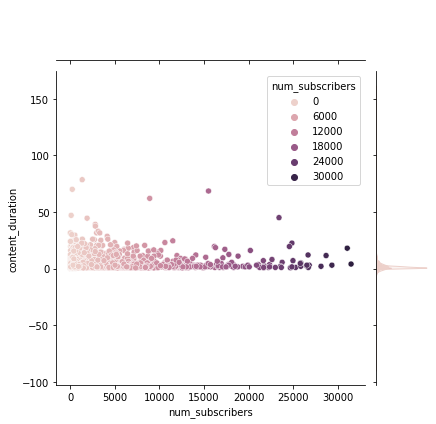

In [23]:
To_plot = ["is_paid","price","num_reviews","num_lectures","content_duration"]
for i in To_plot:
    sns.jointplot(x=df["num_subscribers"], y=df[i], hue=df["num_subscribers"])
    plt.show()

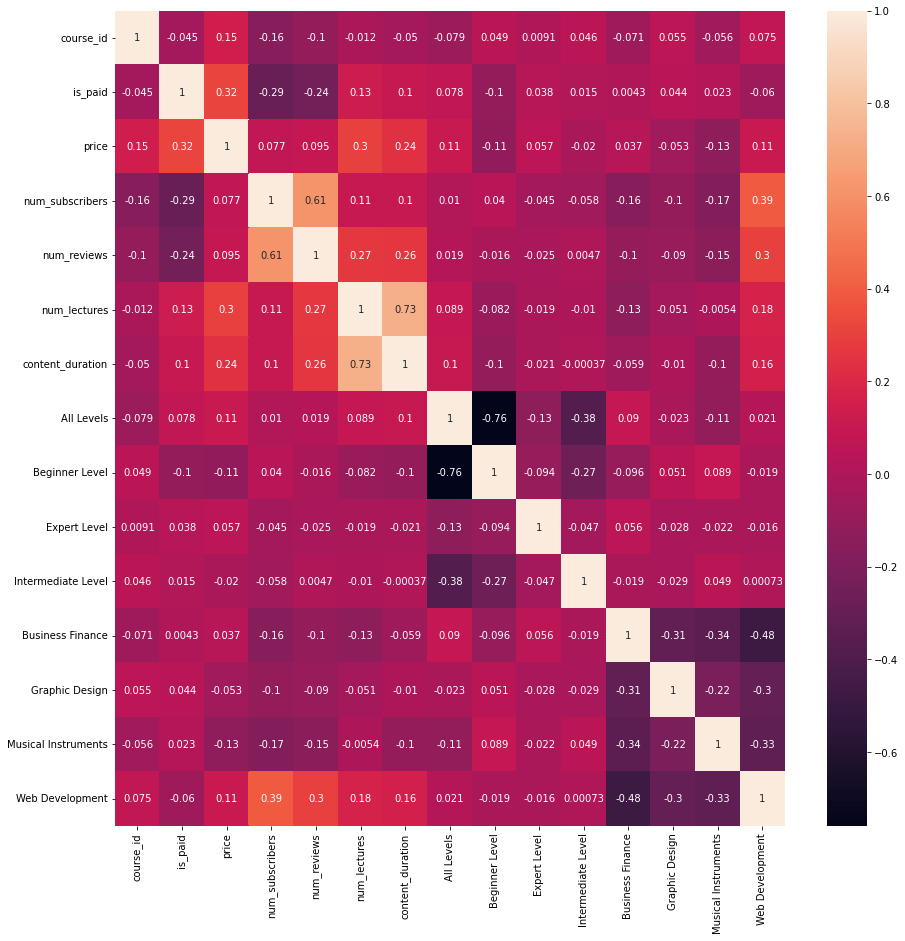

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

*For more analysis on the udemy courses see the attached file with document which contains indepth analysis of the udemy dataset.*

# **Train test split**

In [25]:
df1=df
df1.shape

(3565, 18)

In [80]:
df2=df1.drop(["course_id","course_title","url","published_timestamp"],axis=1)

In [81]:
df2.shape

(3565, 14)

In [82]:
X=df2.drop(['num_subscribers'], axis=1)
Y=df2['num_subscribers']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# **Model Selection**

In [105]:
def getmodel():
  models=[]
  models.append(('LR' , LogisticRegression()))
  #models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('KNN', KNeighborsRegressor()))
  #models.append(('CART',DecisionTreeRegressor()))
  models.append(('LinearReg', LinearRegression()))
  #models.append(('PR', PolynomialFeatures()))
  models.append(('RF', RandomForestRegressor()))

  return models

In [101]:
for name , model in models:
  print(name, model)

LR LogisticRegression()
LDA LinearDiscriminantAnalysis()
KNN KNeighborsRegressor()
CART <class 'sklearn.tree._classes.DecisionTreeRegressor'>
LinearReg LinearRegression()
PR PolynomialFeatures()
RF RandomForestRegressor()


In [83]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                      ("pca1",PCA(n_components=6)),
                      ("LR",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                      ("pca2",PCA(n_components=6)),
                      ("DT",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                      ("pca3",PCA(n_components=6)),
                      ("RF",RandomForestRegressor())])

pipeline_knn=Pipeline([("scalar4",StandardScaler()),
                       ("pca4",PCA(n_components=6)),("KN",KNeighborsRegressor())])


#List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#Getting CV scores    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


LinearRegression: -3164.617549 
DecisionTree: -4216.755199 
RandomForest: -3109.248797 
KNeighbors: -3099.127238 


In [108]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Model Evaluation
r2 = metrics.r2_score(y_test, pred)
Adjusted_r2 = 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

# initialise data of lists.
ResultData = [[r2],[Adjusted_r2],[mae],[mse],[rmse]]
# Creates pandas DataFrame.
Results = pd.DataFrame(ResultData,columns= ["Scores"] ,index = ["R-Squared","Adjusted R-Squared", "Mean Absolute Error","Mean Square Error","Root Mean Square Error"])
Results

,Scores
R-Squared,2.628587e-01
Adjusted R-Squared,2.537841e-01
Mean Absolute Error,1.681480e+03
Mean Square Error,9.341093e+06
Root Mean Square Error,3.056320e+03
